In [1]:
# Librerias necesarias
import cv2
import math
import time
import warnings
import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as ss
from numpy import linalg as LA
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.morphology import remove_small_holes, erosion, square
warnings.filterwarnings("ignore")

In [2]:
def sacar_imagen_canal(imagen, canal):
    matriz = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            fila.append(np.uint8(imagen[i][j][canal]))
        fila = np.array(fila)
        matriz.append(fila)
    matriz = np.array(matriz)
    return matriz

In [3]:
def union_imagen(imagen_1, imagen_2, imagen_3):
    matriz = []
    for i in range(len(imagen_1)):
        fila = []
        for j in range(len(imagen_1[0])):
            fila.append([imagen_1[i][j], imagen_2[i][j], imagen_3[i][j]])
        matriz.append(fila)
    return matriz

In [4]:
def transformacion_imagen(imagen, ruido):
    nueva_imagen = []
    for i in range(len(imagen)):
        lista = []
        for j in range(len(imagen[0])):
            R = max(min(int(imagen[i][j][0] + ruido[i][j][0]),255), 0)
            G = max(min(int(imagen[i][j][1] + ruido[i][j][1]),255), 0)
            B = max(min(int(imagen[i][j][2] + ruido[i][j][2]),255), 0)
            lista.append([R,G,B])
        nueva_imagen.append(lista)
    return nueva_imagen

In [5]:
def maxima_intensidad_imagen(imagen):
    lista = []
    for i in range(len(imagen)):
        for j in range(len(imagen[0])):
            lista.append(imagen[i][j][0])
            lista.append(imagen[i][j][1])
            lista.append(imagen[i][j][2])
    maximo = max(lista)
    return maximo

In [6]:
def muestreo_normal(porcentaje, imagen):
    maxima_intensidad = maxima_intensidad_imagen(imagen)
    sigma = porcentaje*maxima_intensidad
    total_datos = len(imagen)*len(imagen[0])
    muestreo_1 = np.random.normal(0, sigma, total_datos)
    muestreo_2 = np.random.normal(0, sigma, total_datos)
    muestreo_3 = np.random.normal(0, sigma, total_datos)
    ruido = []
    alto = len(imagen)
    ancho = len(imagen[0])
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista.append([muestreo_1[j + i*ancho], muestreo_2[j + i*ancho], muestreo_3[j + i*ancho]])
        ruido.append(lista)
    return ruido

In [7]:
def imagen_para_aplicar_filtro(imagen):
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto+4):
        lista = []
        for j in range(ancho+4):
            if i == 0 or i == 1 or i == alto + 3 or i == alto + 2 or j == 0 or j == 1 or j == ancho + 3 or j == ancho + 2:
                lista.append([0, 0, 0])
            else:
                lista.append([imagen[i-2][j-2][0], imagen[i-2][j-2][1], imagen[i-2][j-2][2]]) 
        matriz.append(lista)
    return matriz

In [8]:
def filtro_media(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista_R = []
            lista_R.append(imagen_filtro[i+1][j+1][0])
            lista_R.append(imagen_filtro[i+1][j+2][0])
            lista_R.append(imagen_filtro[i+1][j+3][0])
            lista_R.append(imagen_filtro[i+2][j+1][0])
            lista_R.append(imagen_filtro[i+2][j+2][0])
            lista_R.append(imagen_filtro[i+2][j+3][0])
            lista_R.append(imagen_filtro[i+3][j+1][0])
            lista_R.append(imagen_filtro[i+3][j+2][0])
            lista_R.append(imagen_filtro[i+3][j+3][0])
            lista_G = []
            lista_G.append(imagen_filtro[i+1][j+1][1])
            lista_G.append(imagen_filtro[i+1][j+2][1])
            lista_G.append(imagen_filtro[i+1][j+3][1])
            lista_G.append(imagen_filtro[i+2][j+1][1])
            lista_G.append(imagen_filtro[i+2][j+2][1])
            lista_G.append(imagen_filtro[i+2][j+3][1])
            lista_G.append(imagen_filtro[i+3][j+1][1])
            lista_G.append(imagen_filtro[i+3][j+2][1])
            lista_G.append(imagen_filtro[i+3][j+3][1])
            lista_B = []
            lista_B.append(imagen_filtro[i+1][j+1][2])
            lista_B.append(imagen_filtro[i+1][j+2][2])
            lista_B.append(imagen_filtro[i+1][j+3][2])
            lista_B.append(imagen_filtro[i+2][j+1][2])
            lista_B.append(imagen_filtro[i+2][j+2][2])
            lista_B.append(imagen_filtro[i+2][j+3][2])
            lista_B.append(imagen_filtro[i+3][j+1][2])
            lista_B.append(imagen_filtro[i+3][j+2][2])
            lista_B.append(imagen_filtro[i+3][j+3][2])
            lista.append([int(np.mean(lista_R)), int(np.mean(lista_G)), int(np.mean(lista_B))])
        matriz.append(lista)    
    return matriz

In [9]:
def filtro_mediana(imagen):
    imagen_filtro = imagen_para_aplicar_filtro(imagen)
    alto = len(imagen)
    ancho = len(imagen[0])
    matriz = []
    for i in range(alto):
        lista = []
        for j in range(ancho):
            lista_R = []
            lista_R.append(imagen_filtro[i+1][j+1][0])
            lista_R.append(imagen_filtro[i+1][j+2][0])
            lista_R.append(imagen_filtro[i+1][j+3][0])
            lista_R.append(imagen_filtro[i+2][j+1][0])
            lista_R.append(imagen_filtro[i+2][j+2][0])
            lista_R.append(imagen_filtro[i+2][j+3][0])
            lista_R.append(imagen_filtro[i+3][j+1][0])
            lista_R.append(imagen_filtro[i+3][j+2][0])
            lista_R.append(imagen_filtro[i+3][j+3][0])
            lista_G = []
            lista_G.append(imagen_filtro[i+1][j+1][1])
            lista_G.append(imagen_filtro[i+1][j+2][1])
            lista_G.append(imagen_filtro[i+1][j+3][1])
            lista_G.append(imagen_filtro[i+2][j+1][1])
            lista_G.append(imagen_filtro[i+2][j+2][1])
            lista_G.append(imagen_filtro[i+2][j+3][1])
            lista_G.append(imagen_filtro[i+3][j+1][1])
            lista_G.append(imagen_filtro[i+3][j+2][1])
            lista_G.append(imagen_filtro[i+3][j+3][1])
            lista_B = []
            lista_B.append(imagen_filtro[i+1][j+1][2])
            lista_B.append(imagen_filtro[i+1][j+2][2])
            lista_B.append(imagen_filtro[i+1][j+3][2])
            lista_B.append(imagen_filtro[i+2][j+1][2])
            lista_B.append(imagen_filtro[i+2][j+2][2])
            lista_B.append(imagen_filtro[i+2][j+3][2])
            lista_B.append(imagen_filtro[i+3][j+1][2])
            lista_B.append(imagen_filtro[i+3][j+2][2])
            lista_B.append(imagen_filtro[i+3][j+3][2])
            lista.append([int(np.median(lista_R)), int(np.median(lista_G)), int(np.median(lista_B))])
        matriz.append(lista)    
    return matriz

In [10]:
def filtro_gamma(imagen, gamma):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            lista = []
            lista.append(min(max(int(255*((imagen[i][j][0]/255)**gamma)),0), 255))
            lista.append(min(max(int(255*((imagen[i][j][1]/255)**gamma)),0), 255))
            lista.append(min(max(int(255*((imagen[i][j][2]/255)**gamma)),0), 255))
            fila.append(lista)
        nueva_imagen.append(fila)
    return nueva_imagen

In [11]:
def pasa_altos_gaussiano(espectro, D_0):
    largo = len(espectro)
    ancho = len(espectro[0])
    vertice_central = np.array([int(largo/2), int(ancho/2)])
    
    nuevo_espectro = []
    
    for i in range(largo):
        fila = []
        for j in range(ancho):
            vertice = np.array([i+1, j+1])
            distancia = np.linalg.norm(vertice-vertice_central)
            exponente = - (distancia**2)/(2*(D_0**2))
            factor = 1 - math.exp(exponente)
            nuevo_elemento = factor*espectro[i][j]
            fila.append(nuevo_elemento)         
        nuevo_espectro.append(fila)

    return nuevo_espectro

In [12]:
def binarizacion_imagen(imagen, tolerancia):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            cantidad = np.linalg.norm(imagen[i][j])
            if cantidad > tolerancia:
                fila.append([255, 255, 255])
            else:
                fila.append([0, 0, 0])
        nueva_imagen.append(fila)
    return nueva_imagen

In [13]:
def identificar_objeto(altura_1, altura_2, ancho_1, ancho_2, imagen_binaria):
    resultados = []
    for i in range(altura_1, altura_2 + 1):
        lista = []
        for j in range(ancho_1, ancho_2 + 1):    
            if imagen_binaria[i][j][0] == 255:
                lista.append(j)
        resultados.append([i, [min(lista), max(lista)]])
    
    lista_1 = []
    lista_2 = []
    for k in resultados:
        lista_1.append(k[0])
        lista_2.append(k[1])
        
    return [lista_1, lista_2]

In [14]:
def sacar_objeto(imagen, listado):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            if i in listado[0]:
                indice = listado[0].index(i)
                if listado[1][indice][0] <= j <= listado[1][indice][1]:
                    fila.append([255, 255, 255])
                else:
                    fila.append(imagen[i][j])
            else:
                fila.append(imagen[i][j])
        nueva_imagen.append(fila)
    return nueva_imagen

In [15]:
def solo_objeto(imagen, listado):
    nueva_imagen = []
    for i in range(len(imagen)):
        fila = []
        for j in range(len(imagen[0])):
            if i in listado[0]:
                indice = listado[0].index(i)
                if listado[1][indice][0] <= j <= listado[1][indice][1]:
                    fila.append(imagen[i][j])
                else:
                    fila.append([255, 255, 255])
            else:
                fila.append([255, 255, 255])
        nueva_imagen.append(fila)
    return nueva_imagen

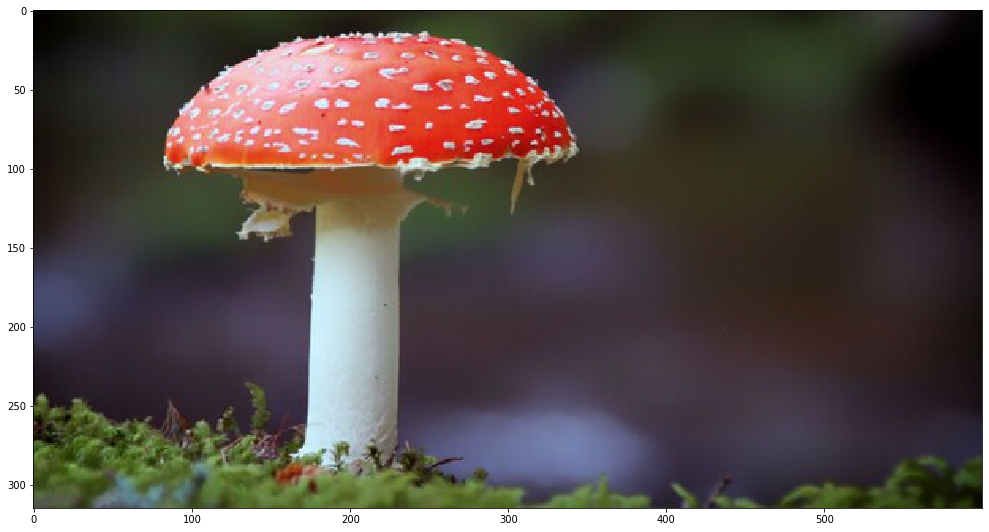

In [16]:
# CARGAR IMAGEN

fig, ax = plt.subplots(figsize=(17,10))
nombre = 'hongos.jpg'
imagen = plt.imread(nombre)
plt.imshow(imagen)

In [17]:
gamma = 0.8
imagen_bajo_contraste = filtro_gamma(imagen, gamma)
porcentaje = 0.05
ruido = muestreo_normal(porcentaje, imagen_bajo_contraste)
imagen_con_ruido_bajo = transformacion_imagen(imagen_bajo_contraste, ruido)

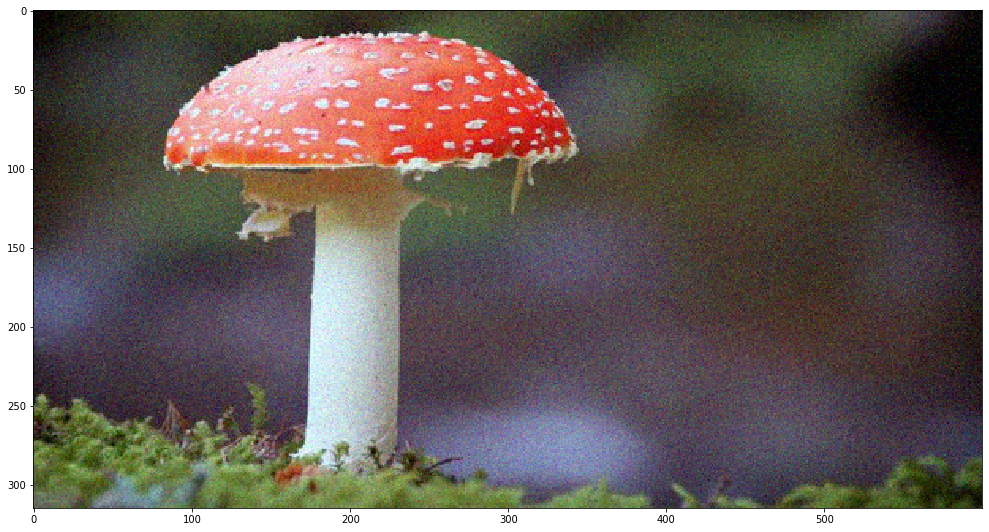

In [18]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_con_ruido_bajo)

In [19]:
filtro_media_imagen = filtro_media(imagen_con_ruido_bajo)
gamma = 1.4
imagen_trabajar = filtro_gamma(filtro_media_imagen, gamma)

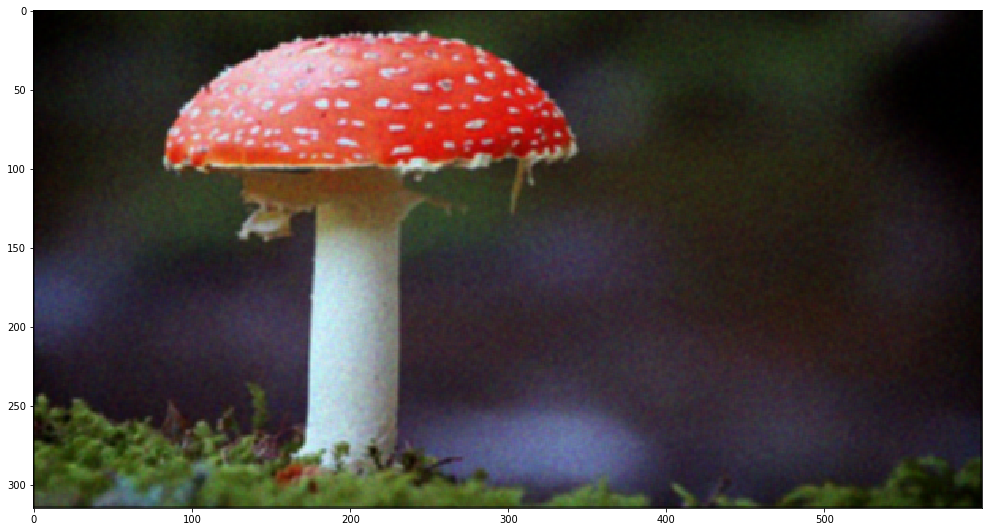

In [20]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_trabajar)

In [21]:
imagen_trabajar_rojo = sacar_imagen_canal(imagen_trabajar, 0)
imagen_trabajar_verde = sacar_imagen_canal(imagen_trabajar, 1)
imagen_trabajar_azul = sacar_imagen_canal(imagen_trabajar, 2)

f_rojo = np.fft.fft2(imagen_trabajar_rojo)
f_verde = np.fft.fft2(imagen_trabajar_verde)
f_azul = np.fft.fft2(imagen_trabajar_azul)

fshift_rojo = np.fft.fftshift(f_rojo)
fshift_verde = np.fft.fftshift(f_verde)
fshift_azul = np.fft.fftshift(f_azul)

magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo))
magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde))
magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul))

In [22]:
D_0 = 30

fshift_rojo_modificado = pasa_altos_gaussiano(fshift_rojo, D_0)
fshift_verde_modificado = pasa_altos_gaussiano(fshift_verde, D_0)
fshift_azul_modificado = pasa_altos_gaussiano(fshift_azul, D_0)

nueva_magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo_modificado))
nueva_magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde_modificado))
nueva_magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul_modificado))

In [23]:
f_ishift_rojo_modificado = np.fft.ifftshift(fshift_rojo_modificado)
img_back_rojo_modificado = np.fft.ifft2(f_ishift_rojo_modificado)
img_back_rojo_modificado = np.uint8(np.abs(img_back_rojo_modificado))

f_ishift_verde_modificado = np.fft.ifftshift(fshift_verde_modificado)
img_back_verde_modificado = np.fft.ifft2(f_ishift_verde_modificado)
img_back_verde_modificado = np.uint8(np.abs(img_back_verde_modificado))

f_ishift_azul_modificado = np.fft.ifftshift(fshift_azul_modificado)
img_back_azul_modificado = np.fft.ifft2(f_ishift_azul_modificado)
img_back_azul_modificado = np.uint8(np.abs(img_back_azul_modificado))

imagen_filtro_gaussiano = union_imagen(img_back_rojo_modificado, img_back_verde_modificado, img_back_azul_modificado)

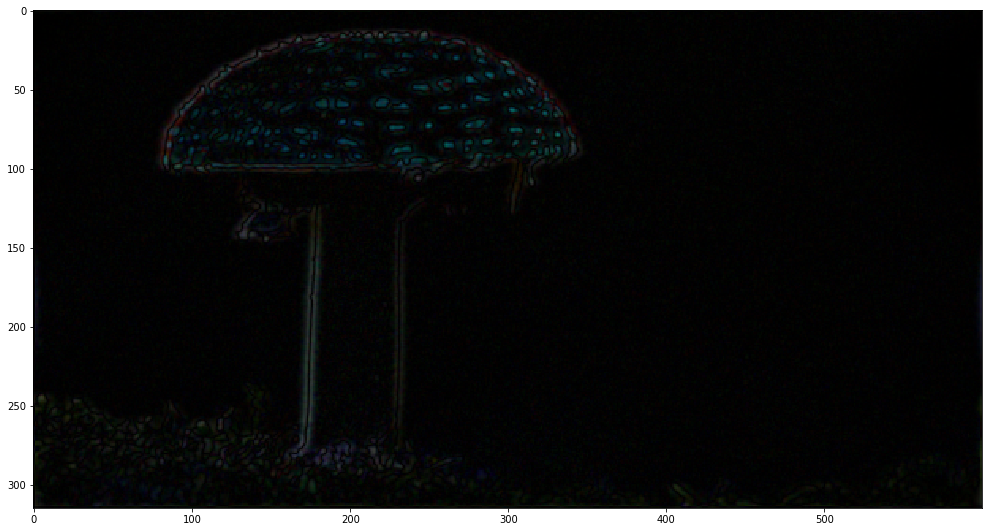

In [24]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_filtro_gaussiano)

In [25]:
tolerancia = 18
imagen_binaria = binarizacion_imagen(imagen_filtro_gaussiano, tolerancia)

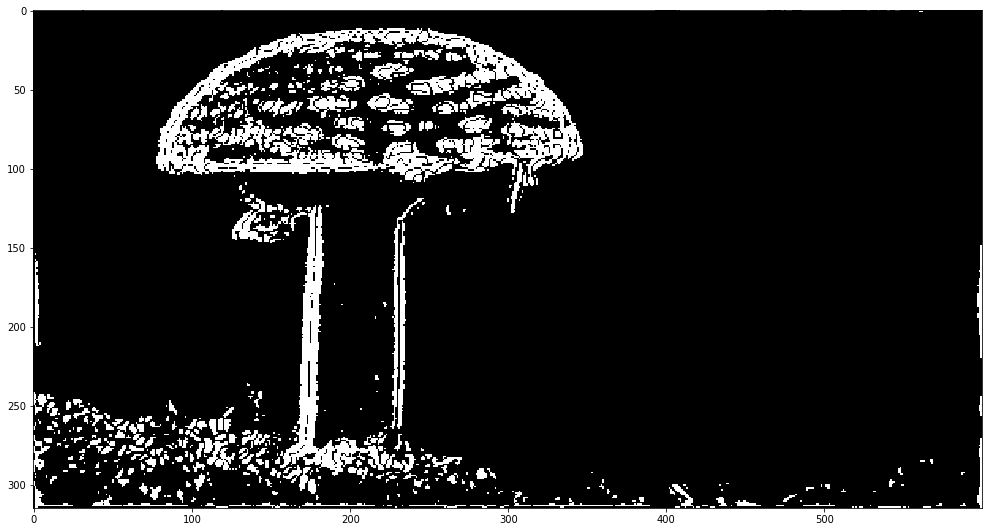

In [26]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [27]:
iteraciones = 1
tolerancia = 18

for i in range(iteraciones):
    start = time.time()
    imagen_binaria = filtro_media(imagen_binaria)
    imagen_binaria = binarizacion_imagen(imagen_binaria, tolerancia)
    end = time.time()
    print("En la iteracion se demoro", [i, end-start])

En la iteracion se demoro [0, 13.50386095046997]


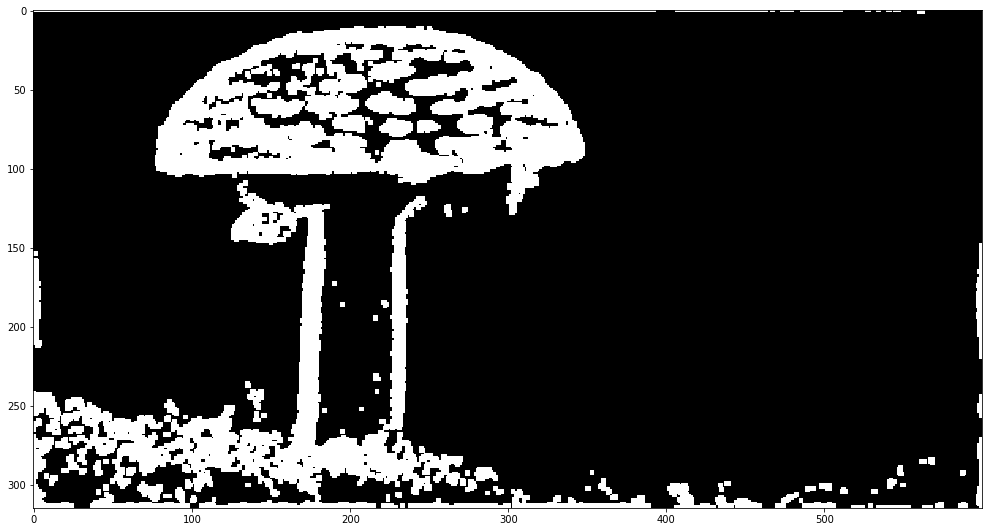

In [28]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [29]:
identificacion = identificar_objeto(11, 105, 50, 400, imagen_binaria)
imagen_sacada = sacar_objeto(imagen_trabajar, identificacion)

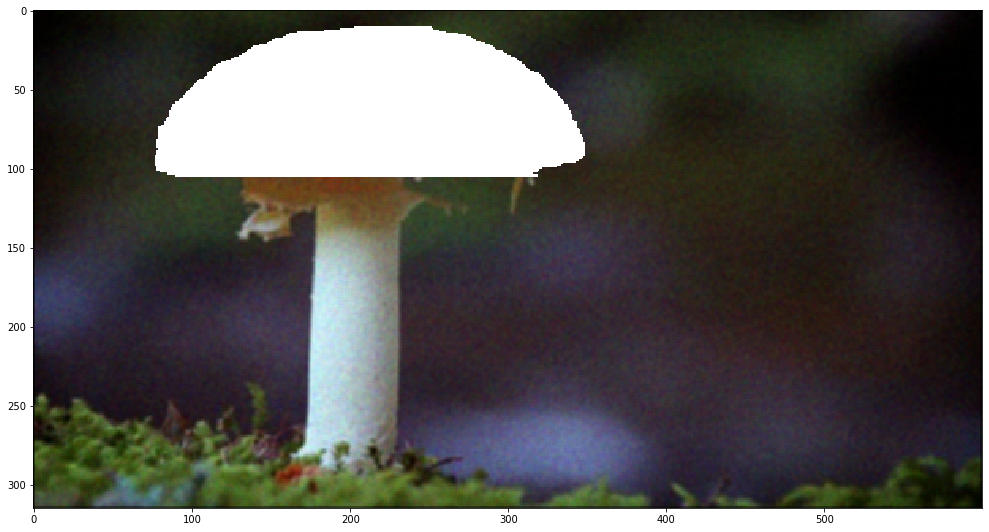

In [30]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sacada)

In [31]:
imagen_sola = solo_objeto(imagen_trabajar, identificacion)

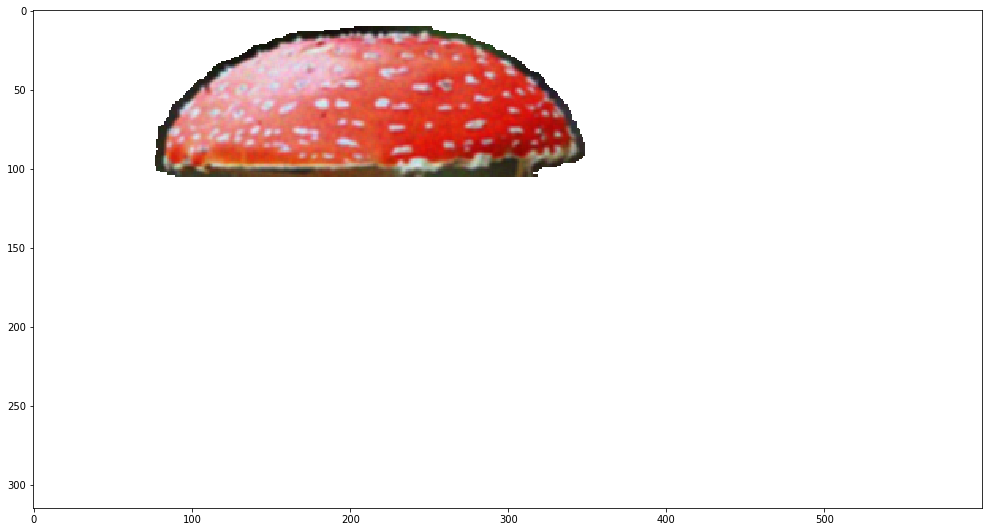

In [32]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sola)

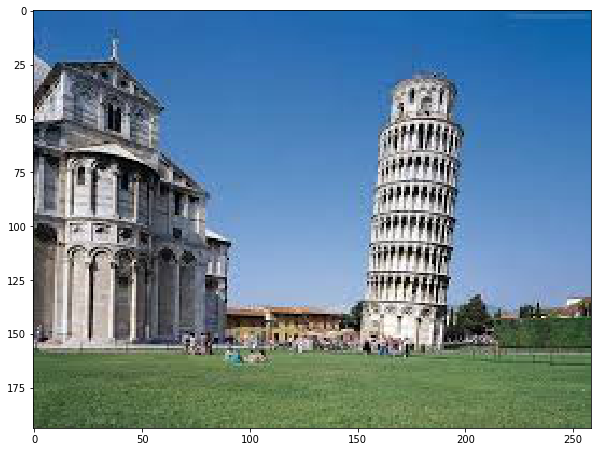

In [33]:
# CARGAR IMAGEN

fig, ax = plt.subplots(figsize=(10,10))
nombre = 'torrepisa.jpg'
imagen = plt.imread(nombre)
plt.imshow(imagen)

In [34]:
gamma = 0.8
imagen_bajo_contraste = filtro_gamma(imagen, gamma)
porcentaje = 0.05
ruido = muestreo_normal(porcentaje, imagen_bajo_contraste)
imagen_con_ruido_bajo = transformacion_imagen(imagen_bajo_contraste, ruido)

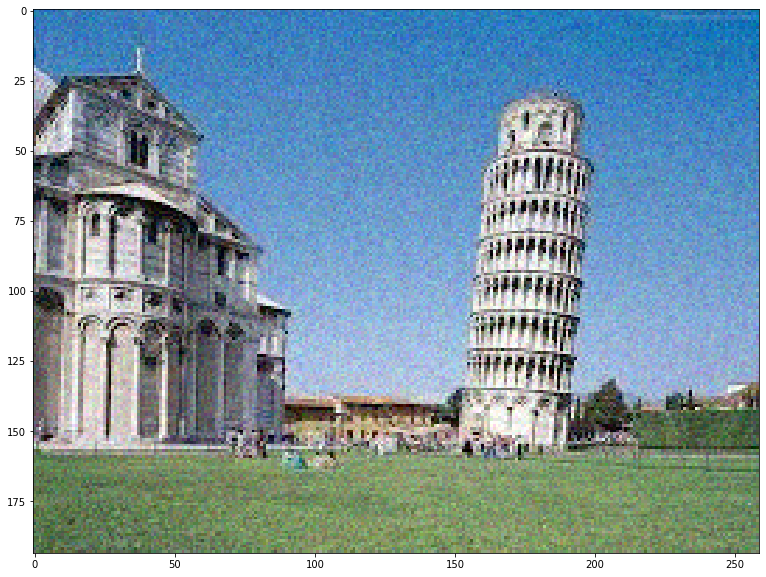

In [35]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_con_ruido_bajo)

In [36]:
filtro_media_imagen = filtro_media(imagen_con_ruido_bajo)
gamma = 1.4
imagen_trabajar = filtro_gamma(filtro_media_imagen, gamma)

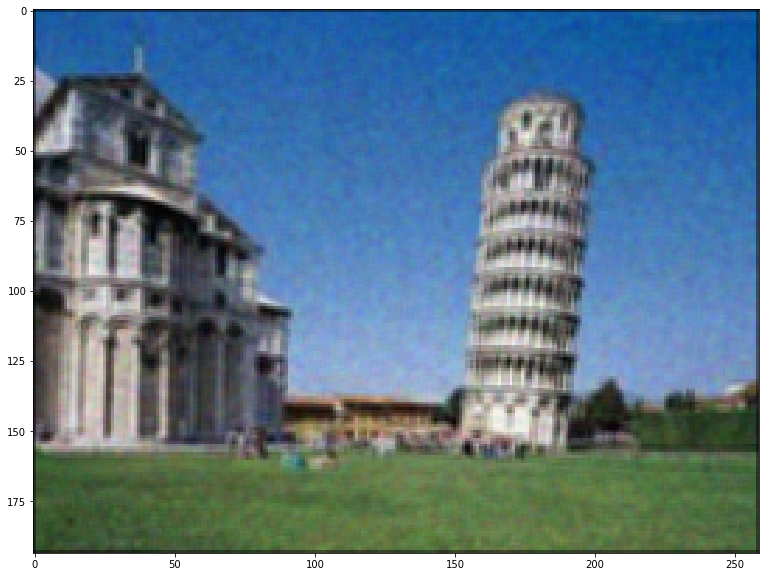

In [37]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_trabajar)

In [38]:
imagen_trabajar_rojo = sacar_imagen_canal(imagen_trabajar, 0)
imagen_trabajar_verde = sacar_imagen_canal(imagen_trabajar, 1)
imagen_trabajar_azul = sacar_imagen_canal(imagen_trabajar, 2)

f_rojo = np.fft.fft2(imagen_trabajar_rojo)
f_verde = np.fft.fft2(imagen_trabajar_verde)
f_azul = np.fft.fft2(imagen_trabajar_azul)

fshift_rojo = np.fft.fftshift(f_rojo)
fshift_verde = np.fft.fftshift(f_verde)
fshift_azul = np.fft.fftshift(f_azul)

magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo))
magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde))
magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul))

In [39]:
D_0 = 30

fshift_rojo_modificado = pasa_altos_gaussiano(fshift_rojo, D_0)
fshift_verde_modificado = pasa_altos_gaussiano(fshift_verde, D_0)
fshift_azul_modificado = pasa_altos_gaussiano(fshift_azul, D_0)

nueva_magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo_modificado))
nueva_magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde_modificado))
nueva_magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul_modificado))

In [40]:
f_ishift_rojo_modificado = np.fft.ifftshift(fshift_rojo_modificado)
img_back_rojo_modificado = np.fft.ifft2(f_ishift_rojo_modificado)
img_back_rojo_modificado = np.uint8(np.abs(img_back_rojo_modificado))

f_ishift_verde_modificado = np.fft.ifftshift(fshift_verde_modificado)
img_back_verde_modificado = np.fft.ifft2(f_ishift_verde_modificado)
img_back_verde_modificado = np.uint8(np.abs(img_back_verde_modificado))

f_ishift_azul_modificado = np.fft.ifftshift(fshift_azul_modificado)
img_back_azul_modificado = np.fft.ifft2(f_ishift_azul_modificado)
img_back_azul_modificado = np.uint8(np.abs(img_back_azul_modificado))

imagen_filtro_gaussiano = union_imagen(img_back_rojo_modificado, img_back_verde_modificado, img_back_azul_modificado)

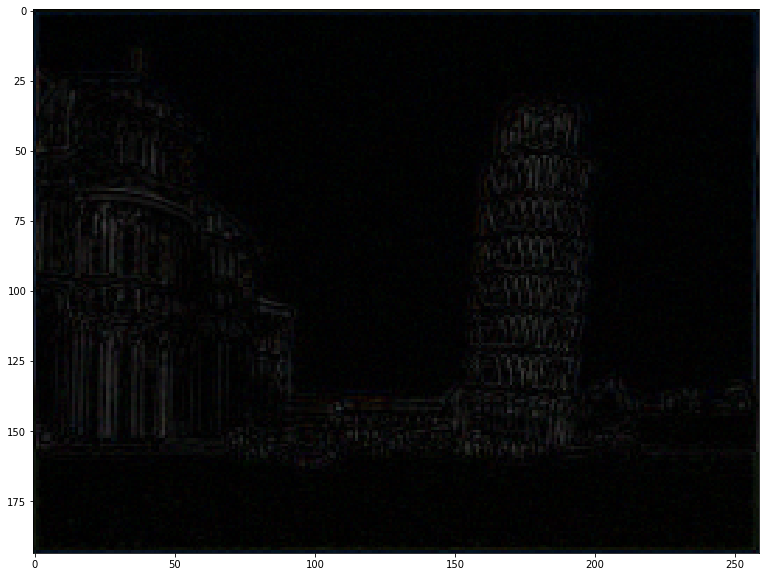

In [41]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_filtro_gaussiano)

In [42]:
tolerancia = 18
imagen_binaria = binarizacion_imagen(imagen_filtro_gaussiano, tolerancia)

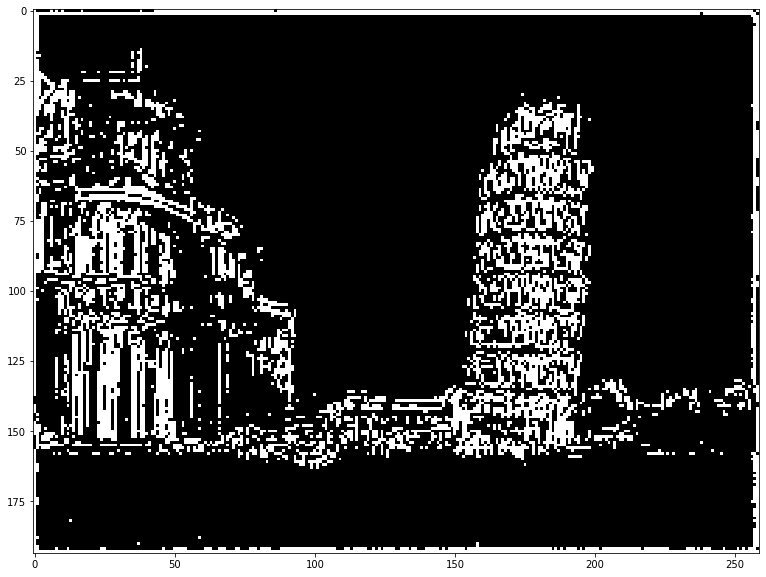

In [43]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [44]:
iteraciones = 1
tolerancia = 18

for i in range(iteraciones):
    start = time.time()
    imagen_binaria = filtro_media(imagen_binaria)
    imagen_binaria = binarizacion_imagen(imagen_binaria, tolerancia)
    end = time.time()
    print("En la iteracion se demoro", [i, end-start])

En la iteracion se demoro [0, 5.204784154891968]


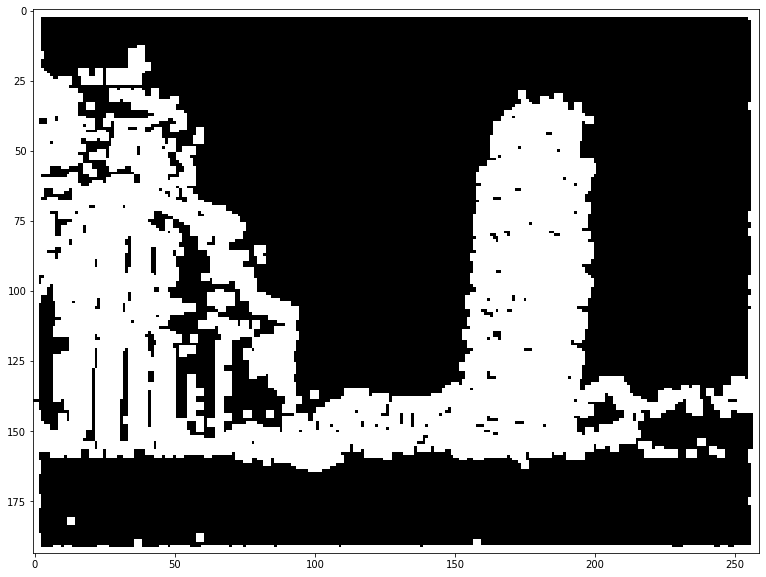

In [45]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [46]:
identificacion = identificar_objeto(30, 150, 150, 200, imagen_binaria)
imagen_sacada = sacar_objeto(imagen_trabajar, identificacion)

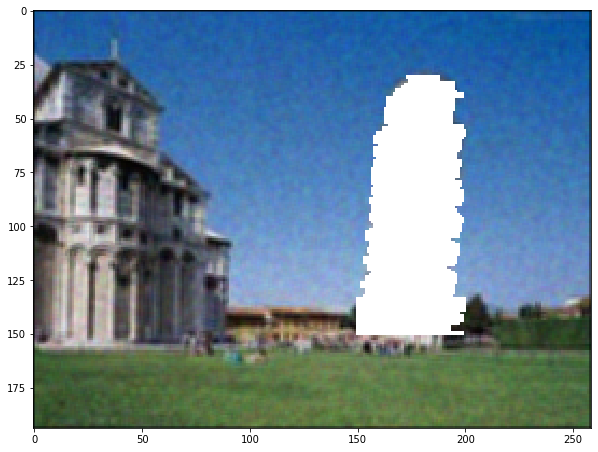

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(imagen_sacada)

In [48]:
imagen_sola = solo_objeto(imagen_trabajar, identificacion)

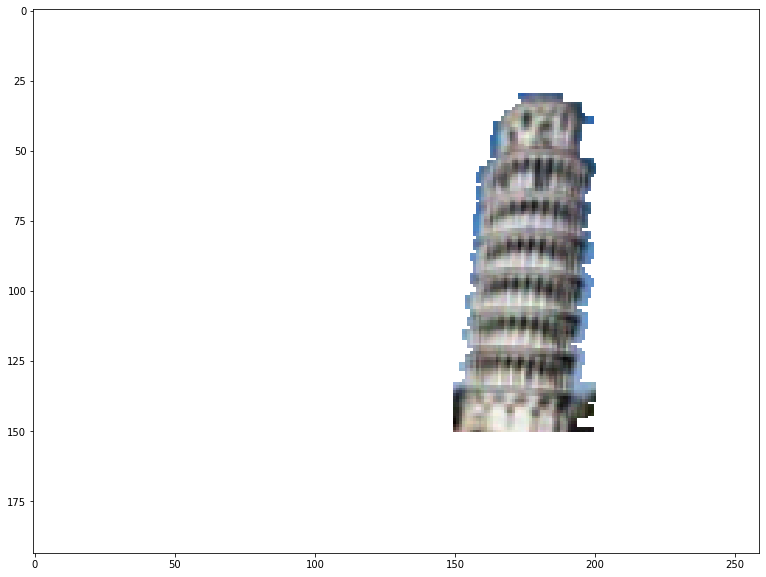

In [49]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sola)

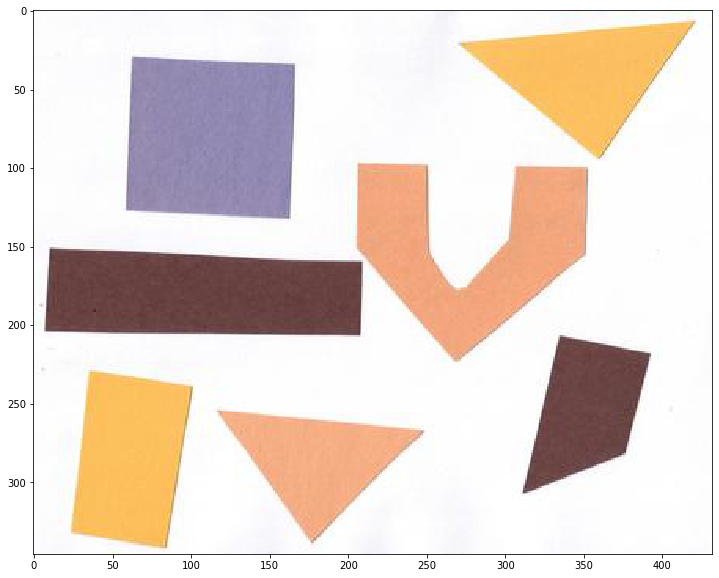

In [50]:
# CARGAR IMAGEN

fig, ax = plt.subplots(figsize=(17,10))
nombre = 'imagenprueba.jpg'
imagen = plt.imread(nombre)
plt.imshow(imagen)

In [51]:
gamma = 0.8
imagen_bajo_contraste = filtro_gamma(imagen, gamma)
porcentaje = 0.05
ruido = muestreo_normal(porcentaje, imagen_bajo_contraste)
imagen_con_ruido_bajo = transformacion_imagen(imagen_bajo_contraste, ruido)

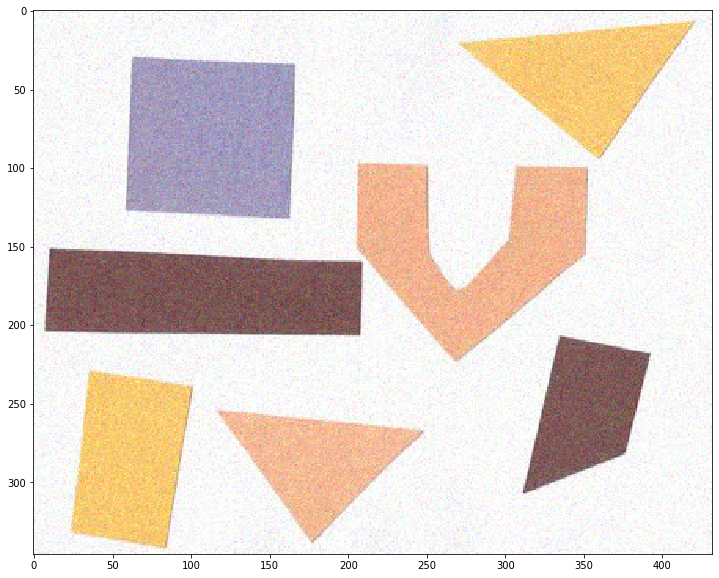

In [52]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_con_ruido_bajo)

In [53]:
filtro_media_imagen = filtro_media(imagen_con_ruido_bajo)
gamma = 1.4
imagen_trabajar = filtro_gamma(filtro_media_imagen, gamma)

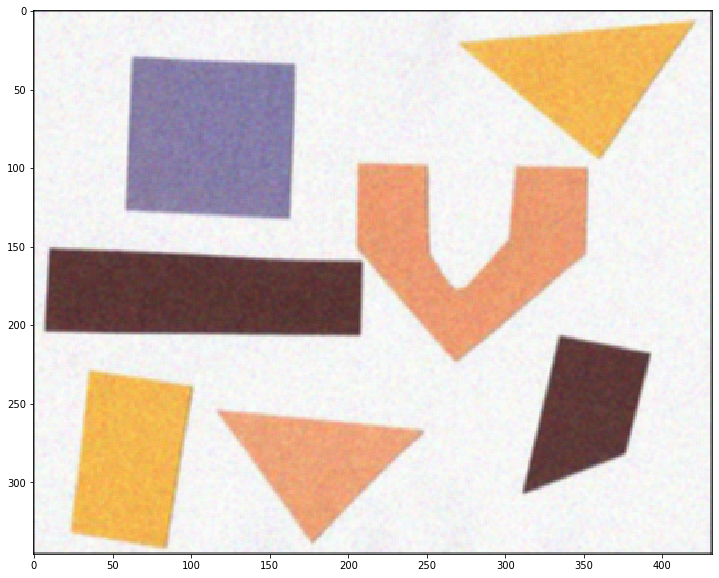

In [54]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_trabajar)

In [55]:
imagen_trabajar_rojo = sacar_imagen_canal(imagen_trabajar, 0)
imagen_trabajar_verde = sacar_imagen_canal(imagen_trabajar, 1)
imagen_trabajar_azul = sacar_imagen_canal(imagen_trabajar, 2)

f_rojo = np.fft.fft2(imagen_trabajar_rojo)
f_verde = np.fft.fft2(imagen_trabajar_verde)
f_azul = np.fft.fft2(imagen_trabajar_azul)

fshift_rojo = np.fft.fftshift(f_rojo)
fshift_verde = np.fft.fftshift(f_verde)
fshift_azul = np.fft.fftshift(f_azul)

magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo))
magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde))
magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul))

In [56]:
D_0 = 30

fshift_rojo_modificado = pasa_altos_gaussiano(fshift_rojo, D_0)
fshift_verde_modificado = pasa_altos_gaussiano(fshift_verde, D_0)
fshift_azul_modificado = pasa_altos_gaussiano(fshift_azul, D_0)

nueva_magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo_modificado))
nueva_magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde_modificado))
nueva_magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul_modificado))

In [57]:
f_ishift_rojo_modificado = np.fft.ifftshift(fshift_rojo_modificado)
img_back_rojo_modificado = np.fft.ifft2(f_ishift_rojo_modificado)
img_back_rojo_modificado = np.uint8(np.abs(img_back_rojo_modificado))

f_ishift_verde_modificado = np.fft.ifftshift(fshift_verde_modificado)
img_back_verde_modificado = np.fft.ifft2(f_ishift_verde_modificado)
img_back_verde_modificado = np.uint8(np.abs(img_back_verde_modificado))

f_ishift_azul_modificado = np.fft.ifftshift(fshift_azul_modificado)
img_back_azul_modificado = np.fft.ifft2(f_ishift_azul_modificado)
img_back_azul_modificado = np.uint8(np.abs(img_back_azul_modificado))

imagen_filtro_gaussiano = union_imagen(img_back_rojo_modificado, img_back_verde_modificado, img_back_azul_modificado)

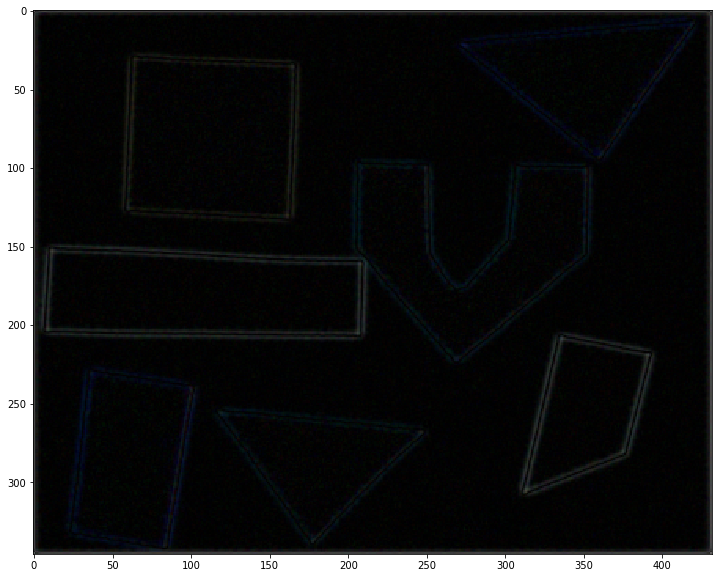

In [58]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_filtro_gaussiano)

In [59]:
tolerancia = 18
imagen_binaria = binarizacion_imagen(imagen_filtro_gaussiano, tolerancia)

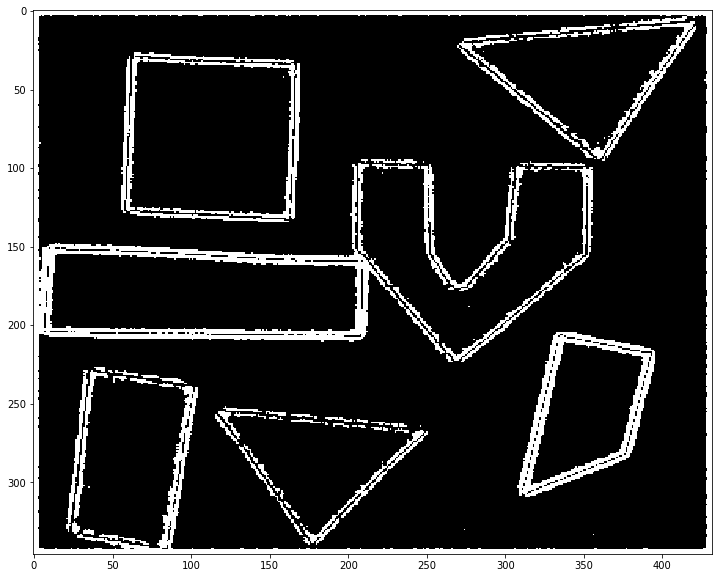

In [60]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [61]:
iteraciones = 1
tolerancia = 18

for i in range(iteraciones):
    start = time.time()
    imagen_binaria = filtro_media(imagen_binaria)
    imagen_binaria = binarizacion_imagen(imagen_binaria, tolerancia)
    end = time.time()
    print("En la iteracion se demoro", [i, end-start])

En la iteracion se demoro [0, 11.387536764144897]


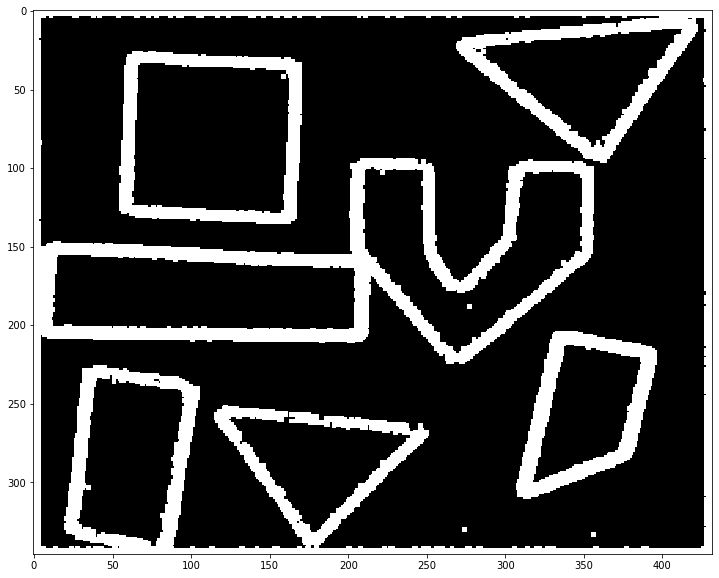

In [62]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [63]:
identificacion = identificar_objeto(28, 133, 20, 180, imagen_binaria)
imagen_sacada = sacar_objeto(imagen_trabajar, identificacion)

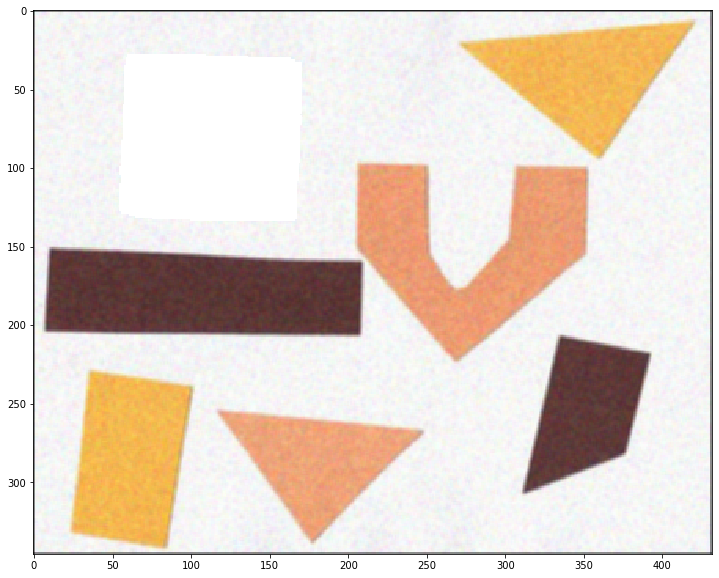

In [64]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sacada)

In [65]:
imagen_sola = solo_objeto(imagen_trabajar, identificacion)

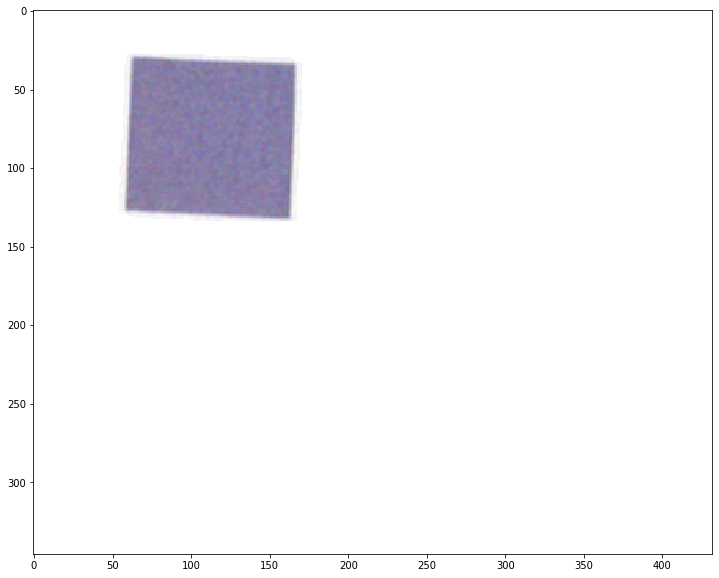

In [66]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sola)

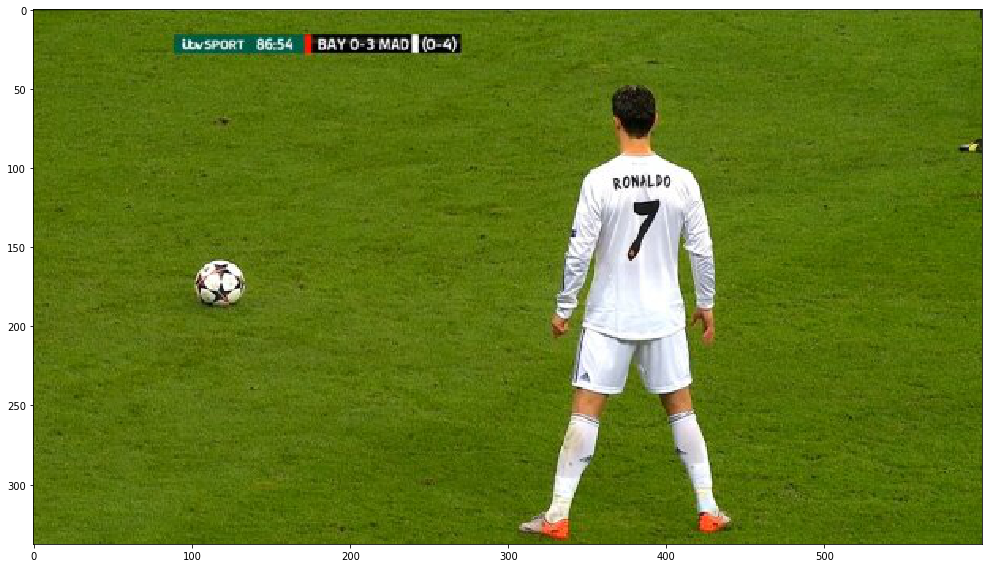

In [67]:
# CARGAR IMAGEN

fig, ax = plt.subplots(figsize=(17,10))
nombre = 'cristiano.jpg'
imagen = plt.imread(nombre)
plt.imshow(imagen)

In [68]:
gamma = 0.8
imagen_bajo_contraste = filtro_gamma(imagen, gamma)
porcentaje = 0.05
ruido = muestreo_normal(porcentaje, imagen_bajo_contraste)
imagen_con_ruido_bajo = transformacion_imagen(imagen_bajo_contraste, ruido)

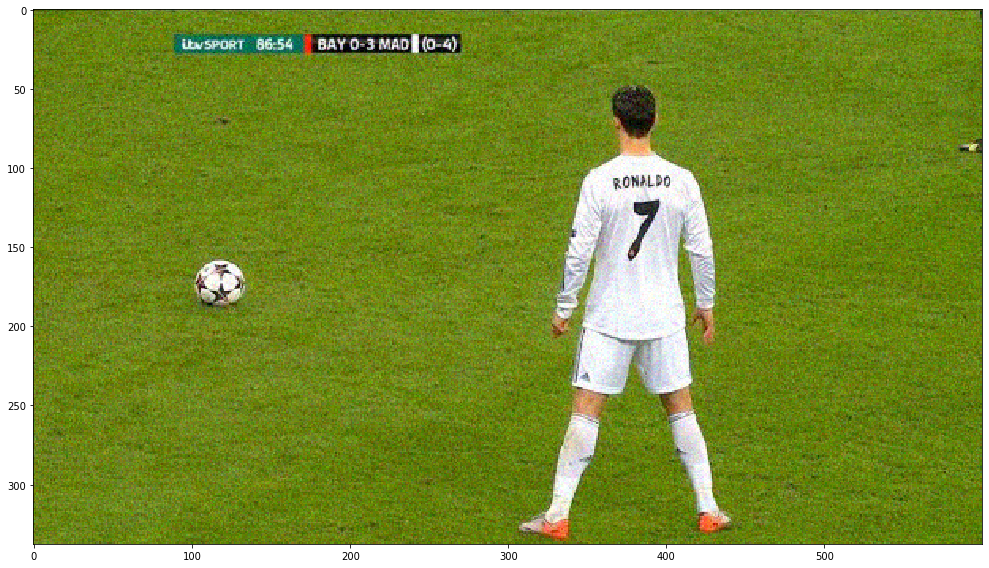

In [69]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_con_ruido_bajo)

In [70]:
filtro_media_imagen = filtro_media(imagen_con_ruido_bajo)
gamma = 1.4
imagen_trabajar = filtro_gamma(filtro_media_imagen, gamma)

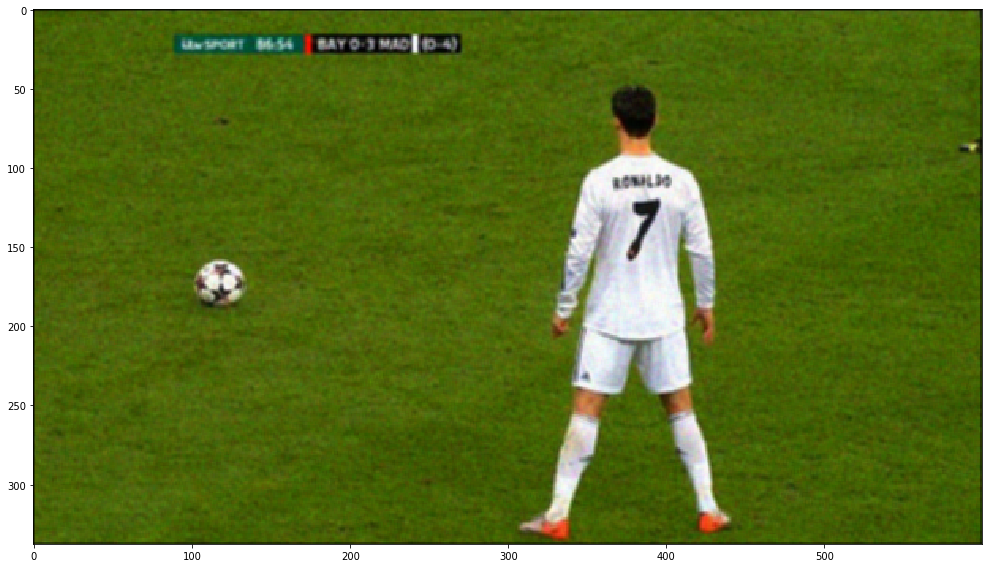

In [71]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_trabajar)

In [72]:
imagen_trabajar_rojo = sacar_imagen_canal(imagen_trabajar, 0)
imagen_trabajar_verde = sacar_imagen_canal(imagen_trabajar, 1)
imagen_trabajar_azul = sacar_imagen_canal(imagen_trabajar, 2)

f_rojo = np.fft.fft2(imagen_trabajar_rojo)
f_verde = np.fft.fft2(imagen_trabajar_verde)
f_azul = np.fft.fft2(imagen_trabajar_azul)

fshift_rojo = np.fft.fftshift(f_rojo)
fshift_verde = np.fft.fftshift(f_verde)
fshift_azul = np.fft.fftshift(f_azul)

magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo))
magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde))
magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul))

In [73]:
D_0 = 30

fshift_rojo_modificado = pasa_altos_gaussiano(fshift_rojo, D_0)
fshift_verde_modificado = pasa_altos_gaussiano(fshift_verde, D_0)
fshift_azul_modificado = pasa_altos_gaussiano(fshift_azul, D_0)

nueva_magnitud_espectro_rojo = 20*np.log(np.abs(fshift_rojo_modificado))
nueva_magnitud_espectro_verde = 20*np.log(np.abs(fshift_verde_modificado))
nueva_magnitud_espectro_azul = 20*np.log(np.abs(fshift_azul_modificado))

In [74]:
f_ishift_rojo_modificado = np.fft.ifftshift(fshift_rojo_modificado)
img_back_rojo_modificado = np.fft.ifft2(f_ishift_rojo_modificado)
img_back_rojo_modificado = np.uint8(np.abs(img_back_rojo_modificado))

f_ishift_verde_modificado = np.fft.ifftshift(fshift_verde_modificado)
img_back_verde_modificado = np.fft.ifft2(f_ishift_verde_modificado)
img_back_verde_modificado = np.uint8(np.abs(img_back_verde_modificado))

f_ishift_azul_modificado = np.fft.ifftshift(fshift_azul_modificado)
img_back_azul_modificado = np.fft.ifft2(f_ishift_azul_modificado)
img_back_azul_modificado = np.uint8(np.abs(img_back_azul_modificado))

imagen_filtro_gaussiano = union_imagen(img_back_rojo_modificado, img_back_verde_modificado, img_back_azul_modificado)

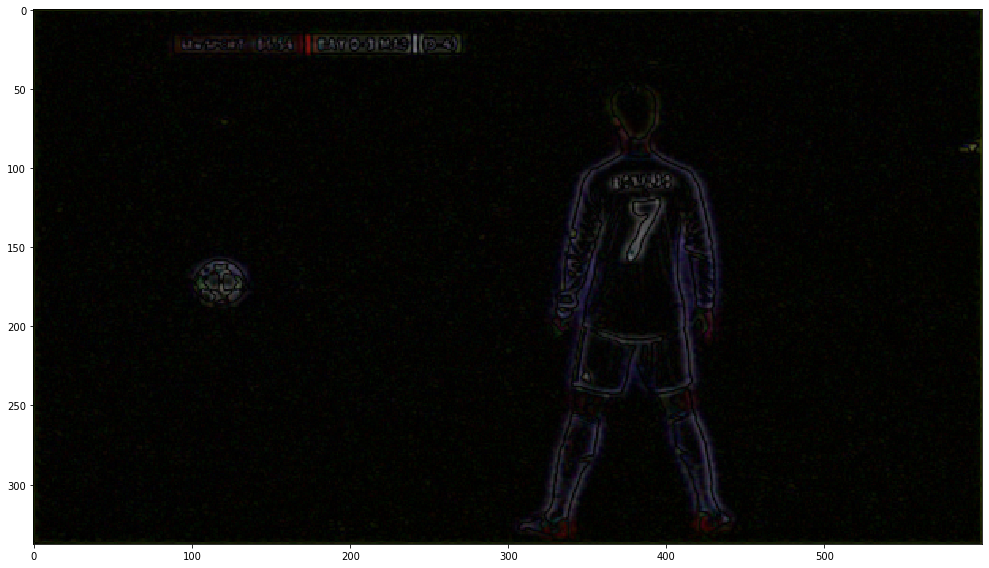

In [75]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_filtro_gaussiano)

In [76]:
tolerancia = 18
imagen_binaria = binarizacion_imagen(imagen_filtro_gaussiano, tolerancia)

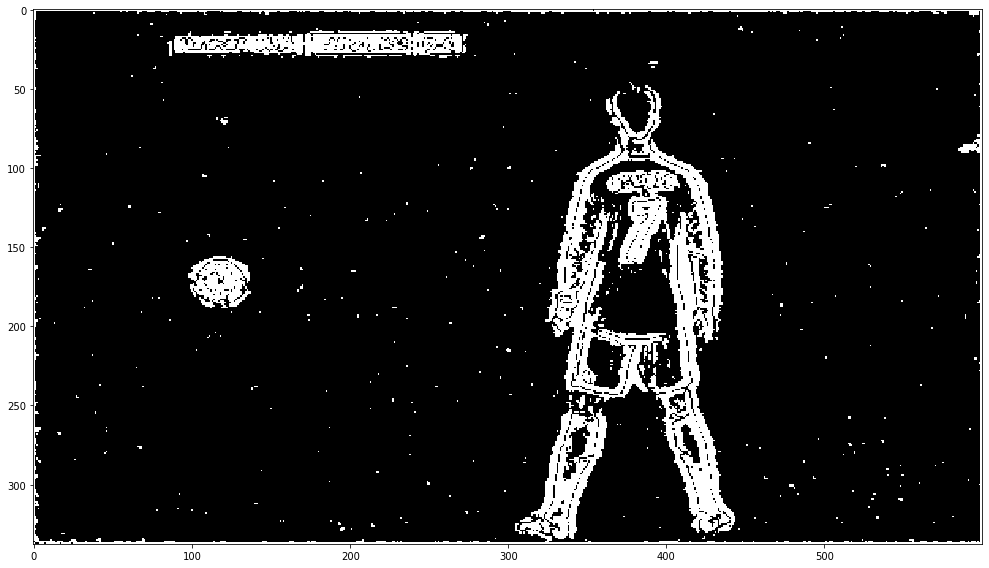

In [77]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [78]:
iteraciones = 1
tolerancia = 18

for i in range(iteraciones):
    start = time.time()
    imagen_binaria = filtro_media(imagen_binaria)
    imagen_binaria = binarizacion_imagen(imagen_binaria, tolerancia)
    end = time.time()
    print("En la iteracion se demoro", [i, end-start])

En la iteracion se demoro [0, 14.47543215751648]


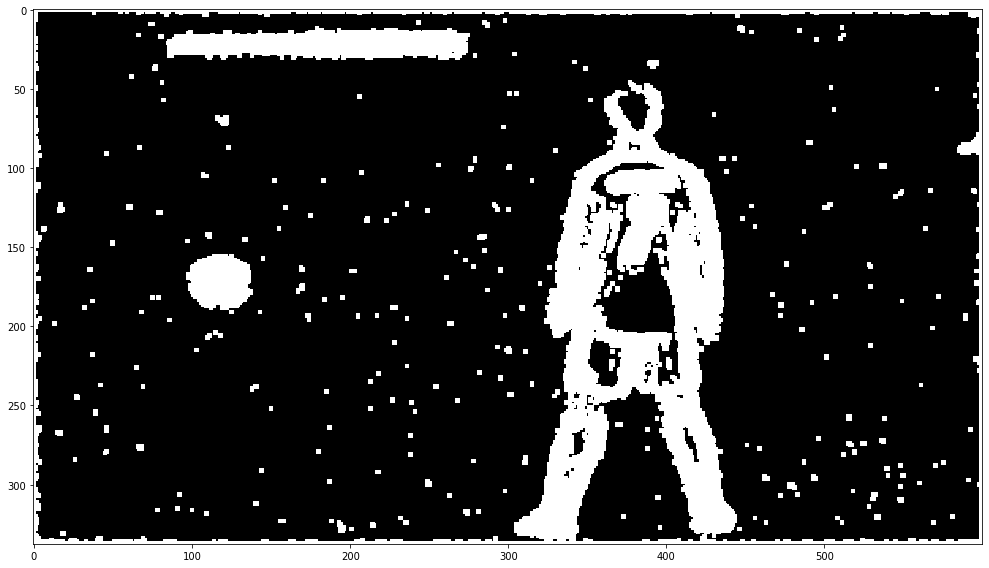

In [79]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [80]:
iteraciones_mediana = 20

for i in range(iteraciones_mediana):
    start = time.time()
    imagen_binaria = filtro_mediana(imagen_binaria)
    end = time.time()
    print("Iteración: ", i)
    print("Tiempo: ", end-start)

Iteración:  0
Tiempo:  27.060004711151123
Iteración:  1
Tiempo:  23.972466707229614
Iteración:  2
Tiempo:  25.033504486083984
Iteración:  3
Tiempo:  24.239053964614868
Iteración:  4
Tiempo:  25.17845845222473
Iteración:  5
Tiempo:  25.873641967773438
Iteración:  6
Tiempo:  29.938221216201782
Iteración:  7
Tiempo:  32.67392063140869
Iteración:  8
Tiempo:  29.32383942604065
Iteración:  9
Tiempo:  27.249377965927124
Iteración:  10
Tiempo:  24.46818494796753
Iteración:  11
Tiempo:  26.616607666015625
Iteración:  12
Tiempo:  25.813618659973145
Iteración:  13
Tiempo:  25.98009705543518
Iteración:  14
Tiempo:  27.679149866104126
Iteración:  15
Tiempo:  25.162821292877197
Iteración:  16
Tiempo:  26.551713466644287
Iteración:  17
Tiempo:  25.326592445373535
Iteración:  18
Tiempo:  28.33720827102661
Iteración:  19
Tiempo:  27.278153896331787


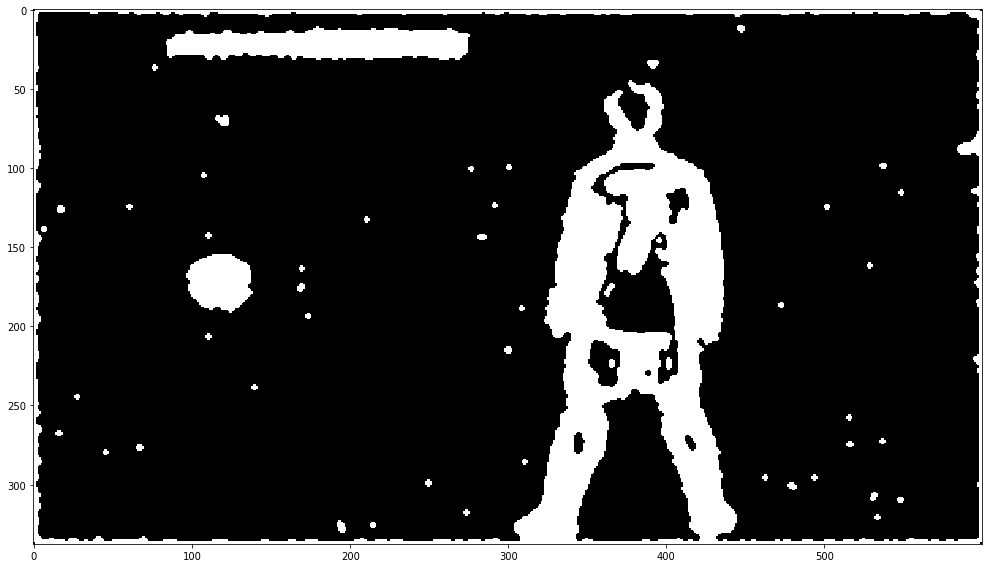

In [81]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_binaria)

In [82]:
identificacion = identificar_objeto(155, 186, 75, 150, imagen_binaria)
imagen_sacada = sacar_objeto(imagen_trabajar, identificacion)

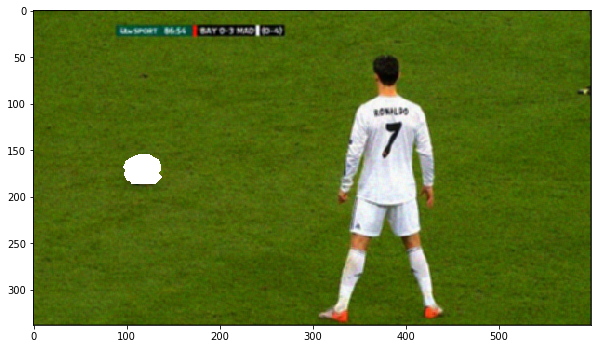

In [83]:
fig, ax = plt.subplots(figsize=(10,10))
plt.imshow(imagen_sacada)

In [84]:
imagen_sola = solo_objeto(imagen_trabajar, identificacion)

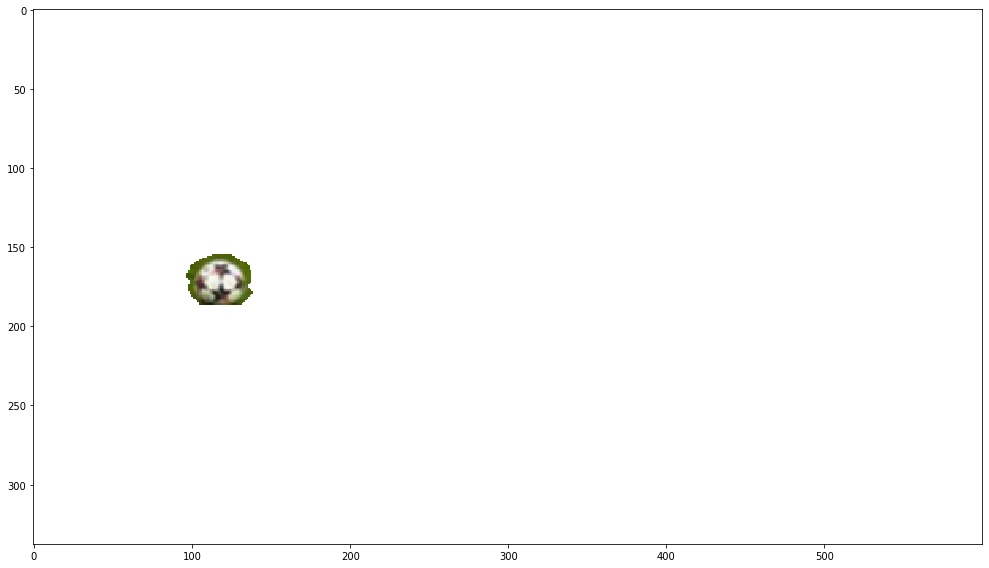

In [85]:
fig, ax = plt.subplots(figsize=(17,10))
plt.imshow(imagen_sola)